In [1]:
import sys
sys.path.insert(0, '/root/conda/lib/python3.9/site-packages')

In [2]:
from pathlib import Path
import pickle, gzip, math, os, time, shutil, matplotlib as mpl, matplotlib.pyplot as plt

In [3]:
MNIST_URL='https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'

In [4]:
path_data = Path('data')

In [5]:
path_data.mkdir(exist_ok=True)

In [6]:
path_gz = path_data/'mnist.pkl.gz'

In [7]:
from urllib.request import urlretrieve
if not path_gz.exists(): urlretrieve(MNIST_URL, path_gz)

In [8]:
!ls -l data

total 16653
-rw-r--r-- 1 root root 17051982 Mar 13 07:11 mnist.pkl.gz


In [9]:
with gzip.open(path_gz, 'rb') as f: ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [10]:
lst1 = list(x_train[0])
vals = lst1[200:210]
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [11]:
def chunks(x, sz):
    for i in range(0, len(x), sz): yield(x[i:i+sz])

In [12]:
list(chunks(vals, 5))

[[0.0, 0.0, 0.0, 0.19140625, 0.9296875],
 [0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]]

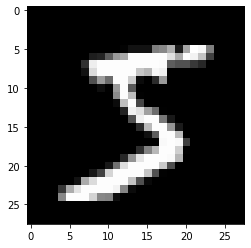

In [13]:
mpl.rcParams['image.cmap'] = 'gray'
plt.imshow(list(chunks(lst1, 28)));

In [14]:
from itertools import islice

In [15]:
it = iter(vals)

In [16]:
list(islice(it, 5))

[0.0, 0.0, 0.0, 0.19140625, 0.9296875]

In [17]:
list(islice(it, 5))

[0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]

In [18]:
list(islice(it, 5))

[]

In [19]:
it = iter(lst1)
img = list(iter(lambda: list(islice(it, 28)), []))

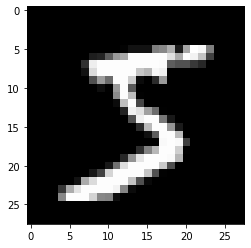

In [20]:
plt.imshow(img);

In [21]:
it = iter(lst1)

In [22]:
def f(): return list(islice(it, 28))

In [23]:
img = list(iter(f, []))

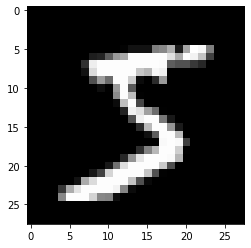

In [24]:
plt.imshow(img);

In [25]:
img[20][15]

0.98828125

In [26]:
class Matrix:
    def __init__(self, xs): self.xs = xs
    def __getitem__(self, idxs): return self.xs[idxs[0]][idxs[1]]

In [27]:
im = Matrix(img)
im[20,15]

0.98828125

In [28]:
class MyList:
    def __init__(self, data):
        self.data = data

    def __getitem__(self, key):
        if isinstance(key, slice):
            print(f"Custom slicing: start={key.start}, stop={key.stop}, step={key.step}")
            return self.data[key.start:key.stop:key.step]
        else:
            return self.data[key]

my_list = MyList([[0, 1, 2], [3, 4, 5]])
print(my_list[0][1])  # Triggers __getitem__ with a slice object

1


In [29]:
import torch
from torch import tensor

In [30]:
a = tensor([[1,2,3],[2,3,4]])

In [31]:
a

tensor([[1, 2, 3],
        [2, 3, 4]])

In [32]:
tens = tensor(img)

In [33]:
tens[20,15]

tensor(0.9883)

In [34]:
x_train, y_train, x_valid, y_valid = map(tensor, (x_train, y_train, x_valid, y_valid))

In [35]:
x_train.shape

torch.Size([50000, 784])

In [36]:
x_train.type()

'torch.FloatTensor'

In [37]:
imgs = x_train.reshape(-1,28,28)
imgs.shape

torch.Size([50000, 28, 28])

In [38]:
rnd_state = None
def seed(a):
    global rnd_state
    a, x = divmod(a, 30268)
    a, y = divmod(a, 30306)
    a, z = divmod(a, 30322)
    rnd_state = int(x)+1, int(y)+1, int(z)+1

In [39]:
seed(457428938475)
rnd_state

(4976, 20238, 499)

In [40]:
def rand():
    global rnd_state
    x, y, z = rnd_state
    x = (171 * x) % 30269
    y = (172 * y) % 30307
    z = (170 * z) % 30323
    rnd_state = x,y,z
    return (x/30269 + y/30307 + z/30323) % 1.0

In [41]:
rand(),rand(),rand()

(0.7645251082582081, 0.7920889799553945, 0.06912886811267205)

In [42]:
if os.fork(): print(f'In parent: {rand()}')
else:
    print(f'In child: {rand()}')
    os._exit(os.EX_OK)

In parent: 0.9559050644103264
In child: 0.9559050644103264


In [43]:
if os.fork(): print(f'In parent: {torch.rand(1)}')
else:
    print(f'In child: {torch.rand(1)}')
    os._exit(os.EX_OK)

In parent: tensor([0.8769])
In child: tensor([0.8769])


In [44]:
import numpy as np

In [45]:
if os.fork(): print(f'In parent: {np.random.rand(1)}')
else:
    print(f'In child: {np.random.rand(1)}')
    os._exit(os.EX_OK)

In parent: [0.17724124]
In child: [0.17724124]


In [46]:
import os
from random import random

In [47]:
if os.fork(): print(f'In parent: {random()}')
else:
    print(f'In child: {random()}')
    os._exit(os.EX_OK)

In parent: 0.3377416926584641
In child: 0.2895444802007403


In [48]:
random()

0.14704747436339993

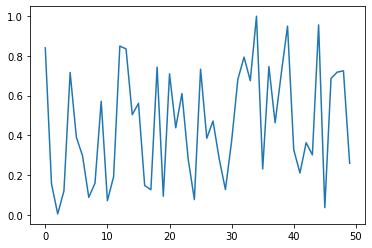

In [49]:
plt.plot([rand() for _ in range(50)]);

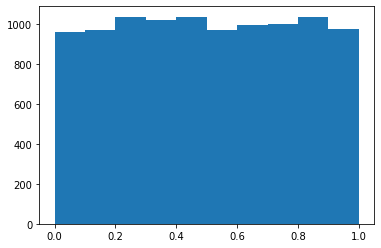

In [50]:
plt.hist([rand() for _ in range(10000)]);

In [51]:
 %timeit -n 10 list(chunks([rand() for _ in range(7840)], 10))

3.41 ms ± 70.9 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [52]:
%timeit -n 10 torch.randn(784,10)

69.9 µs ± 27.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [53]:
torch.manual_seed(1)
weights = torch.randn(784,10)
bias = torch.zeros(10)

In [54]:
m1 = x_valid[:5]
m2 = weights

In [55]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [56]:
ar,ac = m1.shape
br,bc = m2.shape
(ar,ac), (br,bc)

((5, 784), (784, 10))

In [57]:
t1 = torch.zeros(ar,bc)
t1.shape

torch.Size([5, 10])

In [58]:
for i in range(ar):
    for j in range(bc):
        for k in range(ac):
            t1[i,j] += m1[i,k] * m2[k,j]

In [59]:
t1

tensor([[-10.9417,  -0.6844,  -7.0038,  -4.0066,  -2.0857,  -3.3588,   3.9127,
          -3.4375, -11.4696,  -2.1153],
        [ 14.5430,   5.9977,   2.8914,  -4.0777,   6.5914, -14.7383,  -9.2787,
           2.1577, -15.2772,  -2.6758],
        [  2.2204,  -3.2171,  -4.7988,  -6.0453,  14.1661,  -8.9824,  -4.7922,
          -5.4446, -20.6758,  13.5657],
        [ -6.7097,   8.8998,  -7.4611,  -7.8966,   2.6994,  -4.7260, -11.0278,
         -12.9776,  -6.4443,   3.6376],
        [ -2.4444,  -6.4034,  -2.3984,  -9.0371,  11.1772,  -5.7724,  -8.9214,
          -3.7862,  -8.9827,   5.2797]])

In [60]:
torch.set_printoptions(precision=2,linewidth=140, sci_mode=False)
t1

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [61]:
import numpy as np
np.set_printoptions(precision=2, linewidth=140)

In [62]:
def matmul(a,b):
    t = torch.zeros(a.shape[0],b.shape[1])
    for i in range(a.shape[0]):
        for j in range(b.shape[1]):
            for k in range(a.shape[1]):
                t[i,j] += a[i,k] * b[k,j]
    return t

In [63]:
%time _=matmul(m1, m2)

CPU times: user 797 ms, sys: 0 ns, total: 797 ms
Wall time: 797 ms


In [64]:
ar*bc*ac

39200

In [65]:
from numba import njit

In [66]:
@njit
def dot(a,b):
    res = 0.
    for i in range(len(a)): res += a[i]*b[i]
    return res

In [67]:
def matmul(a,b):
    (ar,ac), (br,bc) = a.shape, b.shape
    t = torch.zeros(ar,bc)
    for i in range(ar):
        for j in range(bc):
            t[i, j] = dot(a[i,:], b[:,j])
    return t

In [68]:
from fastcore.test import *

In [69]:
test_close(t1, matmul(np.array(m1),np.array(m2)))

In [70]:
%timeit -n 50 matmul(np.array(m1),np.array(m2))

704 µs ± 116 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [71]:
a = tensor([10., 6, -4])
b = tensor([2., 8, 7])
a,b

(tensor([10.,  6., -4.]), tensor([2., 8., 7.]))

In [72]:
a + b

tensor([12., 14.,  3.])

In [73]:
(a < b).float().mean()

tensor(0.67)

In [74]:
m = tensor([[1., 2, 3], [4,5,6], [7,8,9]]); m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [75]:
sf = (m*m).sum(); sf

tensor(285.)

In [76]:
sf.sqrt()

tensor(16.88)

In [77]:
m[2,:], m[:,2]

(tensor([7., 8., 9.]), tensor([3., 6., 9.]))

In [78]:
def matmul(a,b):
    (ar,ac), (br,bc) = a.shape, b.shape
    t = torch.zeros(ar,bc)
    for i in range(ar):
        for j in range(bc):
            t[i, j] = (a[i,:] * b[:,j]).sum()
    return t

In [79]:
test_close(t1, matmul(m1,m2))

In [80]:
%timeit -n 50 matmul(m1,m2)

1.51 ms ± 41.8 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [81]:
def matmul(a,b):
    (ar,ac), (br,bc) = a.shape, b.shape
    t = torch.zeros(ar,bc)
    for i in range(ar):
        for j in range(bc):
            t[i, j] = torch.dot(a[i,:] , b[:,j])
    return t

In [82]:
test_close(t1, matmul(m1,m2))

In [83]:
%timeit -n 50 matmul(m1,m2)

1 ms ± 17.1 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [84]:
a

tensor([10.,  6., -4.])

In [85]:
c = tensor([10.,20,30]); c

tensor([10., 20., 30.])

In [86]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [87]:
m.shape, c.shape

(torch.Size([3, 3]), torch.Size([3]))

In [88]:
m + c

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [89]:
t = c.expand_as(m); t

tensor([[10., 20., 30.],
        [10., 20., 30.],
        [10., 20., 30.]])

In [90]:
m + t

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [91]:
t.storage()

/tmp/ipykernel_130/1911556638.py:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  t.storage()


 10.0
 20.0
 30.0
[torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 3]

In [92]:
t.stride(), t.shape

((0, 1), torch.Size([3, 3]))

In [93]:
c, c.shape

(tensor([10., 20., 30.]), torch.Size([3]))

In [94]:
c.unsqueeze(0).shape, c.unsqueeze(1).shape

(torch.Size([1, 3]), torch.Size([3, 1]))

In [95]:
c.unsqueeze(0), c.unsqueeze(1)

(tensor([[10., 20., 30.]]),
 tensor([[10.],
         [20.],
         [30.]]))

In [96]:
m + c.unsqueeze(1)

tensor([[11., 12., 13.],
        [24., 25., 26.],
        [37., 38., 39.]])

In [97]:
m + c.unsqueeze(0)

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [98]:
c.unsqueeze(0), c[None, :]

(tensor([[10., 20., 30.]]), tensor([[10., 20., 30.]]))

In [99]:
c.unsqueeze(1), c[:, None]

(tensor([[10.],
         [20.],
         [30.]]),
 tensor([[10.],
         [20.],
         [30.]]))

In [100]:
c.shape, c[None].shape, c[...,None].shape, c[None,...].shape

(torch.Size([3]), torch.Size([1, 3]), torch.Size([3, 1]), torch.Size([1, 3]))

In [101]:
digit = m1[0]
digit.shape,m2.shape

(torch.Size([784]), torch.Size([784, 10]))

In [102]:
(digit[:,None]*m2).shape, (digit[:,None]*m2).sum(dim=0).shape

(torch.Size([784, 10]), torch.Size([10]))

In [103]:
def matmul(a,b):
    (ar,ac), (br,bc) = a.shape, b.shape
    t = torch.zeros(ar,bc)
    for i in range(ar):
        t[i] = (a[i,:,None] * b).sum(dim=0)
    return t

In [104]:
test_close(t1, matmul(m1,m2))

In [105]:
%timeit -n 50 matmul(m1,m2)

241 µs ± 39.6 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [106]:
%time _=matmul(x_train, weights)

CPU times: user 1.61 s, sys: 0 ns, total: 1.61 s
Wall time: 1.61 s


In [107]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [128]:
torch.manual_seed(42)
a = torch.randn(4)
b = torch.randn(5)
a,b

(tensor([0.34, 0.13, 0.23, 0.23]), tensor([-1.12, -0.19,  2.21, -0.64,  0.46]))

In [129]:
torch.einsum('i,j->ij',a,b)

tensor([[-0.38, -0.06,  0.74, -0.21,  0.16],
        [-0.14, -0.02,  0.28, -0.08,  0.06],
        [-0.26, -0.04,  0.52, -0.15,  0.11],
        [-0.26, -0.04,  0.51, -0.15,  0.11]])

In [131]:
torch.einsum('ij,jk->k', torch.randn(2,3),torch.randn(3,4))

tensor([-0.49, -0.50,  1.13,  1.55])

In [127]:
torch.einsum('ii->i', a)

tensor([ 1.93, -1.23, -0.39,  0.76])

In [126]:
(a*a).sum()

tensor(23.15)

In [132]:
torch.manual_seed(42)
As = torch.randn(3, 2, 5)
Bs = torch.randn(3, 5, 4)
As,Bs

(tensor([[[ 1.93,  1.49,  0.90, -2.11,  0.68],
          [-1.23, -0.04, -1.60, -0.75,  1.65]],
 
         [[-0.39, -1.40, -0.73, -0.56, -2.32],
          [-0.22, -1.38, -0.87, -0.22,  1.72]],
 
         [[ 0.32, -0.42, -0.83,  0.33, -1.56],
          [ 1.00, -0.88, -0.60, -1.27,  2.12]]]),
 tensor([[[-1.09, -0.36, -0.91, -0.66],
          [ 0.08,  0.53, -0.49,  1.19],
          [-1.39, -1.29, -1.40,  0.04],
          [-0.06,  0.68, -0.10,  1.84],
          [ 1.39, -0.45,  1.45,  0.86]],
 
         [[ 2.22,  0.52,  0.35, -0.20],
          [-0.45, -0.77, -0.17,  0.52],
          [ 0.06,  0.43,  0.58, -0.64],
          [ 0.34,  1.70,  0.01, -0.34],
          [-1.34, -0.59,  0.54,  0.52]],
 
         [[-1.47,  1.43,  0.74, -0.48],
          [ 0.19, -0.36, -0.32,  0.59],
          [-0.89,  0.41, -1.46, -0.10],
          [ 0.35,  0.62, -0.17,  0.23],
          [ 4.04,  1.28, -0.01,  0.24]]]))

In [136]:
As[:,0,1]

tensor([ 1.49, -1.40, -0.42])

In [138]:
torch.einsum(As, [..., 0, 1], Bs, [..., 1, 2], [..., 0, 2]).shape

torch.Size([3, 2, 4])

In [139]:
A = torch.randn(3, 5, 4)
l = torch.randn(2, 5)
r = torch.randn(2, 4)

In [142]:
p = torch.einsum('ab,cbd->acd',l,A); p.shape

torch.Size([2, 3, 4])

In [149]:
q = torch.einsum('abc,ac->ab',p,r)

In [150]:
s = torch.einsum('ab,cbd,ad->ac',l,A,r)

In [151]:
test_close(q,s)

In [152]:
#torch.einsum??

In [153]:
def matmul(a,b): return torch.einsum('ij,jk->ik',a,b)

In [156]:
test_close(t1, matmul(m1,m2))

In [160]:
%timeit -n 5 _=matmul(x_train, weights)

8.02 ms ± 1.78 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [161]:
test_close(t1, (m1@m2))

In [205]:
tr = x_train@weights

In [206]:
%timeit -n 5 _= x_train@weights

13.1 ms ± 668 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [207]:
tr.shape

torch.Size([50000, 10])

In [185]:
def matmul(grid, a, b, c):
    i, j = grid
    if i < c.shape[0] and j < c.shape[1]:
        tmp = 0.
        for k in range(a.shape[1]):
            tmp += a[i,k] * b[k,j]
        c[i,j] = tmp

In [187]:
grid = (0,0)
c = np.zeros(t1.shape)
matmul(grid,m1,m2,c)
c

array([[-10.94,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ]])

In [188]:
def launch_kernel(kernel, grid_x, grid_y, *args, **kwargs):
    for i in range(grid_x):
        for j in range(grid_y):
            kernel((i,j), *args, **kwargs)

In [190]:
c = np.zeros(t1.shape)
grid_x, grid_y = c.shape
launch_kernel(matmul, grid_x, grid_y, m1, m2, c)
c

array([[-10.94,  -0.68,  -7.  ,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
       [ 14.54,   6.  ,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
       [  2.22,  -3.22,  -4.8 ,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
       [ -6.71,   8.9 ,  -7.46,  -7.9 ,   2.7 ,  -4.73, -11.03, -12.98,  -6.44,   3.64],
       [ -2.44,  -6.4 ,  -2.4 ,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [191]:
from numba import cuda

In [195]:
@cuda.jit
def matmul(a, b, c):
    i, j = cuda.grid(2)
    if i < c.shape[0] and j < c.shape[1]:
        tmp = 0.
        for k in range(a.shape[1]):
            tmp += a[i,k] * b[k,j]
        c[i,j] = tmp

In [196]:
r = np.zeros((x_train.shape[0], weights.shape[1]))
m1g, m2g, rg = map(cuda.to_device, (x_train, weights, r))

In [197]:
TPB = 16
rr,rc = r.shape
blockspergrid = (math.ceil(rr/TPB), math.ceil(rc/TPB))
blockspergrid

(3125, 1)

In [209]:
matmul[blockspergrid, (TPB,TPB)](m1g,m2g,rg)
r = rg.copy_to_host()
test_close(tr, r, eps=1e-3)

In [211]:
r.shape

(50000, 10)

In [213]:
%%timeit -n 10
matmul[blockspergrid, (TPB,TPB)](m1g,m2g,rg)
r = rg.copy_to_host()

6.59 ms ± 482 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [214]:
m1c, m2c = x_train.cuda(), weights.cuda()

In [218]:
r=(m1c@m2c).cpu()

In [219]:
%timeit -n 10 r=(m1c@m2c).cpu()

1.62 ms ± 80.1 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
